---
layout: page
title: Programming with Python
subtitle: Analyzing Topographic Data
minutes: 30
---
 ## Learning Objectives {.objectives}

 *   Explain what a library is, and what libraries are used for
 *   Load a Python library and use the tools it contains
 *   Read data from a file into a program
 *   Assign values to variables
 *   Select individual values and subsections from data
 *   Perform operations on arrays of data
 *   Display simple graphs

While a lot of powerful tools are built into languages like Python,
even more tools exist in [libraries](reference.html#library).

In order to load the elevation data,
we need to [import](reference.html#import) a library called NumPy.
You should use this library if you want to do fancy things with numbers (ie. math),
especially if you have matrices or arrays.
We can load NumPy using:

In [4]:
import numpy

Importing a library is like pulling a toolbox out of a
storage locker and placing it on your workbench, making everything inside the toolbox accessible. Python has a set of built-in functions that are always available (the tools you always have available) and libraries provide
additional functionality (the specialized tools in the toolbox you only sometimes need).


Once we’ve loaded the library, we can
call a function inside that library to read the data file:

In [5]:
numpy.loadtxt('data/topo.asc', delimiter=',')

array([[3198.8391, 3198.123 , 3197.1584, ..., 2583.3293, 2585.4368,
        2589.1079],
       [3198.3306, 3197.5242, 3196.4102, ..., 2582.6992, 2584.9167,
        2587.801 ],
       [3197.9968, 3196.9197, 3195.7188, ..., 2581.8328, 2583.8159,
        2586.0325],
       ...,
       [3325.1509, 3334.7822, 3343.3154, ..., 2780.8191, 2769.3235,
        2762.373 ],
       [3325.0823, 3335.0308, 3345.4963, ..., 2775.3345, 2765.7131,
        2759.6555],
       [3326.6824, 3336.5305, 3348.1343, ..., 2769.7661, 2762.5242,
        2756.6877]])

The expression `numpy.loadtxt(...)` is a [function call](reference.html#function-call)
that asks Python to run the function `loadtxt` that belongs to the `numpy` library.
This [dotted notation](reference.html#dotted-notation), with the syntax `thing.component`, is used
everywhere in Python to refer to parts of things.

The function call to `numpy.loadtxt` has two [parameters](reference.html#parameter):
the name of the file we want to read,
and the [delimiter](reference.html#delimiter) that separates values on a line.
Both need to be character strings (or [strings](reference.html#string), for short)
so we write them in quotes.

Within the Jupyter (iPython) notebook, pressing Shift+Enter runs the
commands in the selected cell. Because we haven't told iPython what to
do with the output of `numpy.loadtxt`, the notebook just displays it on
the screen. In this case, that output is the data we just loaded. By
default, only a few rows and columns are shown (with `...` to omit
elements when displaying big arrays).

Our call to `numpy.loadtxt` read the file but didn’t save it to memory.
In order to access the data, we need to [assign](reference.html#assignment) the values to a [variable](reference.html#variable).
A variable is just a name that refers to an object. Python’s variables
must begin with a letter and are [case sensitive](reference.html#case-sensitive). We can assign a
variable name to an object using `=`.


## Objects and their names {.callout}

What happens when a function is called but the output is not assigned to
a variable is a bit more complicated than simply not saving it. The call
to `numpy.loadtxt` read the file and created an object in memory that
contains the data, but because we didn't assign it to a variable name,
there is no way for us to call this object. While this difference might
seem irrelevant (and, in practice, it probably is), it will be important to
consider how variable names are assigned to objects when we talk about
mutable and immutable objects later on.

A good explanation of how Python handles variables and objects can be
 found [in Jeff Knupp's blog](https://jeffknupp.com/blog/2012/11/13/is-python-callbyvalue-or-callbyreference-neither/).

Let’s re-run numpy.loadtxt and assign the output to a variable name:

In [6]:
topo = numpy.loadtxt('data/topo.asc', delimiter=',')

This command doesn’t produce any visible output. If we want to see the
data, we can print the variable’s value with the command `print`:

In [7]:
print(topo)

[[3198.8391 3198.123  3197.1584 ... 2583.3293 2585.4368 2589.1079]
 [3198.3306 3197.5242 3196.4102 ... 2582.6992 2584.9167 2587.801 ]
 [3197.9968 3196.9197 3195.7188 ... 2581.8328 2583.8159 2586.0325]
 ...
 [3325.1509 3334.7822 3343.3154 ... 2780.8191 2769.3235 2762.373 ]
 [3325.0823 3335.0308 3345.4963 ... 2775.3345 2765.7131 2759.6555]
 [3326.6824 3336.5305 3348.1343 ... 2769.7661 2762.5242 2756.6877]]


 ## Check your understanding {.challenge}

 Track how variable names and values are connected after each statement in the following program:

In [8]:
 mass = 47.5
 age = 122
 mass = mass * 2.0
 age = age - 20

print(mass)

95.0


 ## Sorting out references

 What does the following program print out?

In [9]:
 first, second = 'Grace', 'Hopper'
 third, fourth = second, first
 print(third, fourth)

Hopper Grace


Using its variable name, we can see that [type](reference.html#type) of object the variable name `topo` is assigned 
to:

In [10]:
print(type(topo))

<class 'numpy.ndarray'>


The function `type` tells us that the variable name `topo` currently
points to an N-dimensional array created by the NumPy library. We can also get the shape of the
array:

In [16]:
print(topo.shape)

(500, 500)


This tells us that `topo` has 500 rows and 500 columns. The file
we imported contains elevation data (in meters, 2 degree spacing) for an
area along the Front Range of Colorado, so the area that this array represents is 1 km x 1 km.

The object of
type `numpy.ndarray` that the variable `topo` is assigned to contains the values of the array
as well as some extra information about the array. These are the [members](reference.html#member) or attributes of the object, and they
describe the data in the same way an adjective describes a noun. The
command `topo.shape` calls the `shape` attribute of the object with the variable name
`topo` that describes its dimensions. We use the same dotted notation
for the attributes of objects that we use for the functions inside
libraries because they have the same part-and-whole relationship.


## len() and other built-in functions

The function `len()` returns the length of the longest axis of a
sequence (a numpy array, a list, etc.). Because it is a built-in
function, it is always available for the Python interpreter and doesn't
have to be imported. The function `type()` is another built in function.
You can read about them in the [Python docs](https://docs.python.org/2/library/functions.html).

Ex. What is the length of the variable `topo`? 

In [ ]:
len(topo)

Now, that is weird, topo is supposed to be a 500$\times$500 matrix. In numpy, the array is actually stored as an array of arrays. 

Find a way to return the number of columns and rows using the built-in len() function 

In [22]:
print(len(topo) )   # rows
print(len(topo[0])) # cols

500
500


 ## Who's who in the memory

 You can use the whos command at any time to see what variables you have
 created and what modules you have loaded into the computers memory. As
 this is an IPython command, it will only work if you are in an iPython
 terminal or the Jupyter Notebook.
 
 Try it, check what is currently on your memory

In [23]:
whos

Variable     Type       Data/Info
---------------------------------
age          int        102
first        str        Grace
fourth       str        Grace
mass         float      95.0
matplotlib   module     <module 'matplotlib' from<...>/matplotlib/__init__.py'>
numcols      int        500
numpy        module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
numrows      int        500
second       str        Hopper
third        str        Hopper
topo         ndarray    500x500: 250000 elems, type `float64`, 2000000 bytes (1.9073486328125 Mb)


## Plotting
 
Rasters are just big two dimensional arrays of values. In the case of DEMs, those values
are elevations. It's very hard to get a good sense of what this landscape
looks like by looking directly at the data. This information is better
conveyed through plots and graphics.

Data visualization deserves an entire lecture (or course) of its own,
but we can explore a few features of Python's `matplotlib` library here.
While there is no "official" plotting library in Python, this package is
the de facto standard.

We start by importing the `pyplot` module from the library `matplotlib`:

In [24]:
import matplotlib.pyplot

> ## Some IPython magic
> 
> If you're using an IPython / Jupyter notebook, you'll need to execute
> the following command in order for the plots to appear in
> the notebook instead of a separate window:
> 

In [25]:
%matplotlib inline

> The `%` indicates an IPython magic function - a function that is only
> valid within the notebook environment. Note that you only have to
> execute this function once per notebook.

We can use the function `imshow` within `matplotlib.pyplot` to display arrays as a 2D
image. 

Try to display the 2D `topo` array

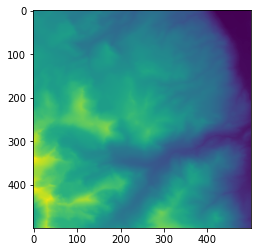

In [27]:
matplotlib.pyplot.imshow(topo)

## Indexing

We can access individual values in an array using an [index](reference.html#index) in square brackets:

In [10]:
print('elevation at the corner of topo:', topo[0,0], 'meters')

elevation at the corner of topo: 3198.8391 meters


In [12]:
print( 'elevation at some random point in topo:', topo[137,65],
'meters')

elevation at some random point in topo: 3251.1179 meters


When referring to entries in a two dimensional array, the indices are
ordered `[row,column]`. The expression `topo[137, 65]` should not surprise
you but `topo[0,0]` might. Programming languages like Fortran and MATLAB
start counting at 1 because that’s what (most) humans have done for
thousands of years. Languages in the C family (including C++, Java,
Perl, and Python) count from 0 because that’s simpler for computers to
do. So if we have an M×N array in Python, the indices go from 0 to M-1
on the first axis (rows) and 0 to N-1 on the second (columns). In
MATLAB, the same array (or matrix) would have indices that go from 1 to
M and 1 to N. Zero-based indexing takes a bit of getting used to, but
one way to remember the rule is that the index is how many steps we have
to take from the start to get to the item we want.

Python also allows for negative indices to refer to the position of
elements with respect to the end of each axis. An index of -1 refer to
the last item in a list, -2 is the second to last, and so on. Since
index `[0,0]` is the upper left corner of an array, index `[-1,-1]`
therefore the lower right corner of the array. 

Print the lower right corner of the `topo` array: 

In [13]:
print(topo[-1,-1])

2756.6877


Print the upper left corner of the `topo` array: 

In [28]:
print(topo[0,0])

3198.8391


> ## In the Corner
>
> What may also surprise you is that when Python displays an array,
> it shows the element with index `[0, 0]` in the upper left corner
> rather than the lower left.
> This is consistent with the way mathematicians draw matrices,
> but different from the Cartesian coordinates.
> The indices are (row, column) instead of (column, row) for the same reason,
> which can be confusing when plotting data.

## Slicing

A command like `topo[0,0]` selects a single element in the array `topo`.
Indices can also be used to [slice](reference.html#slice) sections of the array. For example, we
can select the top left quarter of the array like this:

In [15]:
print(topo[0:5, 0:5])

[[3198.8391 3198.123  3197.1584 3196.2017 3193.8813]
 [3198.3306 3197.5242 3196.4102 3194.7559 3191.9763]
 [3197.9968 3196.9197 3195.7188 3193.3855 3190.5371]
 [3198.054  3196.7031 3194.9573 3192.4451 3189.5288]
 [3198.3289 3196.9111 3195.335  3192.7874 3190.0085]]


The slice `[0:5]` means "Start at index 0 and go along the axis up to,
but not including, index 5".

We don’t need to include the upper or lower bound of the slice if we
want to go all the way to the edge. If we don’t include the lower bound,
Python uses 0 by default; if we don’t include the upper bound, the slice
runs to the end of the axis. If we don’t include either (i.e., if we
just use ‘:’), the slice includes everything. 

Print out the first 5 rows and last 6 columns op the topo array:

In [31]:
print(topo[:4, -6:])

[[2577.6213 2579.3367 2581.2261 2583.3293 2585.4368 2589.1079]
 [2577.1921 2578.7988 2580.666  2582.6992 2584.9167 2587.801 ]
 [2576.6729 2578.2214 2579.9624 2581.8328 2583.8159 2586.0325]
 [2575.9795 2577.5312 2579.2285 2580.9688 2582.8279 2584.7751]]


 ## Point elevations: Practice your skills 
 
 Use indexing to answer the following questions and check your answers
 against the data visualization:
 
 * Is the NW corner of the region higher than the SW corner? What's the elevation difference? You can assume the NW corner to be in the upper left corner of the matrix (NW of at [0,0], not the Cartesian NW, see also (In the Corner)
 * What's the elevation difference between the NE corner and the SE corner?
 * What's the elevation at the center of the region shown in the array?

 ## Slicing strings
 
 Indexing and slicing behave the same way for any type of sequence,
 including numpy arrays, lists, and strings. Create a new variable called
 `text` and assign it the string "The quick brown fox jumped over the
 lazy dog." (note the capitalization and punctuation in each sentence, and include the quotes so Python recognizes it as a string).
 Then use slicing and the `print()` statement to create these frases:
 
 * the lazy dog.
 * The fox jumped over the dog
 * The lazy fox jumped over the quick brown dog.
 

In [34]:
text="The quick brown fox jumped over the lazy dog."

print(text[0:10])

The quick 


 ## Plotting smaller regions 
 
 Use the function `imshow` from `matplotlib.pyplot` to make one plot
 showing the northern half of the region and another plot showing the southern
 half.
 
 Then try making four separate plots showing each quarter of the region
 separately.

 ## Non-square arrays
  
 We've been using `len(topo)/2` as both the row and column indices of the
 center point in the array `topo`. This doesn't work with an array that's
 not square (has different height and width).
 
 * Take a (small) slice of the array `topo` and assign it to a new
 variable. Make this new array have a height longer than its width, and
 make both the height and width even numbers (4 x 6 is a good size).

In [47]:
topo_new =topo[:4,-6:]

TypeError: slice indices must be integers or None or have an __index__ method

  * Access the center point of your new array. Write the indices using variables, not numbers (ie. don't write `t[2,3]`) (Hint: `topo.shape` gives the number of rows and columns in `topo`. The function `len(topo)` returns the length of the first axis. Instead of using `len()`, assign the output of `shape` to a variable and use indexing). Are you *really* pointing to the center of your array? How far off are you? 

## Calculating indices
What happens if you try to access the value of topo at calcualted indices such as : `len(topo)/2` ? 
How can you resolve? 
 

This is all about casting variables (that is transforming them from one data type into another one). 
If you want to learn more about data types and casting, check out [this](https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/numpy/02.01-Understanding-Data-Types.ipynb) repository of  Donne Martin. 

## Numerical operations on arrays

We can perform basic mathematical operations on each individual element of a NumPy array. We can create a new array with elevations in feet:

In [22]:
topo_in_feet = topo * 3.2808
print('Elevation in meters:', topo[0,0])
print('Elevation in feet:', topo_in_feet[0,0])

Elevation in meters: 3198.8391
Elevation in feet: 10494.751319280002


Arrays of the same size can be used together in arithmatic operations:

In [23]:
double_topo = topo + topo
print('Double topo:', double_topo[0,0], 'meters')

Double topo: 6397.6782 meters


We can also perform statistical operations on arrays:

In [24]:
print('Mean elevation:', topo.mean(), 'meters')

Mean elevation: 3153.6216640708008 meters


> ## Methods vs. attributes {.callout}
> 
> `mean` is a method that belongs to the array `topo`, i.e., it is a
> function `topo` can inherently call just because of its type.
> When we call `topo.mean()`, we are asking `topo` to calculate its mean
> value. Because it is a function, we need to include parenthesis in the
> command. Because it is an `np.array`, `topo` also has an attribute called `shape`, but it doesn't include parenthesis because
> attributes are objects, not functions.
> 
> Python will kindly tell us if we mix up the parentheses:
> 

In [48]:
topo.mean

<function ndarray.mean>

NumPy arrays have many other useful methods:

In [49]:
print('Highest elevation:', topo.max(), 'meters')
print('Lowest elevation:', topo.min(), 'meters') 

Highest elevation: 3831.2617 meters
Lowest elevation: 2565.0293 meters


We can also call methods on slices of the array:

In [50]:
half_len = int(len(topo) / 2)

print('Highest elevation of NW quarter:', topo[:half_len,
:half_len].max(), 'meters')

print('Highest elevation of SE quarter:', topo[half_len:,
half_len:].max(), 'meters' )

Highest elevation of NW quarter: 3600.709 meters
Highest elevation of SE quarter: 3575.3262 meters


Methods can also be used along individual axes (rows or columns) of an
array. If we want to see how the mean elevation changes with longitude
(E-W), we can use the method along `axis=0`:

In [51]:
print(topo.mean(axis=0) )

[3428.2054708 3427.6972338 3427.2261988 3426.584768  3426.0234734
 3425.8775458 3425.8402916 3425.8877396 3426.0181264 3426.367201
 3426.5001356 3426.5056046 3426.7196578 3426.83595   3426.8902076
 3426.8796098 3427.0106752 3427.1497438 3426.9835134 3426.5728362
 3426.2113722 3425.9928652 3426.2578698 3426.8117054 3427.2077288
 3427.4824742 3427.6150816 3427.7935558 3428.1331802 3428.6451532
 3428.8814682 3428.1315612 3426.4833232 3424.2040212 3420.8957744
 3417.5235518 3414.35544   3411.0524528 3407.5421916 3403.9730066
 3400.180012  3396.443263  3392.9023536 3389.4827594 3386.0996288
 3382.5170704 3378.9200258 3375.4427244 3371.995064  3368.3281432
 3364.5542568 3360.6775356 3356.9672814 3353.675611  3350.8723902
 3348.2830278 3345.8318692 3343.3299914 3340.7651926 3338.4619194
 3336.1401564 3333.9848948 3332.149046  3330.5379514 3329.1352982
 3328.1674988 3327.3276044 3326.4997932 3325.6943524 3325.0253948
 3324.3619738 3323.7668066 3323.1885194 3322.6112962 3322.1221006
 3321.85086

To see how the mean elevation changes with latitude (N-S), we can use
`axis=1`:

In [30]:
print(topo.mean(axis=1) )

[2942.8326116 2943.959394  2945.045799  2945.9719808 2946.8093426
 2947.596404  2948.420486  2949.274708  2949.997857  2950.5324138
 2950.9564236 2951.5676038 2952.2330212 2953.0946878 2954.1665572
 2955.4393058 2956.5564424 2957.7191494 2959.0154026 2960.4356226
 2961.9122632 2963.4793924 2965.1737982 2966.7024046 2968.1888318
 2969.7119052 2971.2346754 2972.723161  2974.1720514 2975.805006
 2977.9770652 2980.2357216 2982.4065244 2984.609059  2986.675906
 2988.7993386 2990.8434744 2992.8401032 2994.9146994 2996.9524666
 2998.9516138 3000.9031134 3002.6750622 3004.3238364 3005.8296008
 3007.2238078 3008.5737466 3009.9403134 3011.3514118 3012.7873008
 3014.2559672 3015.721623  3017.2519796 3018.9853812 3020.974201
 3023.0632786 3025.2736084 3027.3475148 3029.1742274 3030.797473
 3032.199445  3033.479611  3034.4935618 3035.3736924 3036.234053
 3036.9581828 3037.488056  3037.9723376 3038.5729022 3039.3633732
 3040.1873288 3040.9810826 3041.8867656 3042.6949188 3043.5409014
 3044.6889974 3

## Plotting, take two
 
It's hard to get a sense of how the topography changes across the
landscape from these big tables of numbers. A simpler way to display
this information is with line plots.

We are again going to use the `matplotlib` package for data
visualization. Since we imported the `matplotlib.pyplot` library once
already, those tools are available and can be called within Python. As a
review, though, we are going to write every step needed to load and plot
the data.

We use the function `plot` to create two basic line plots of the
topography:

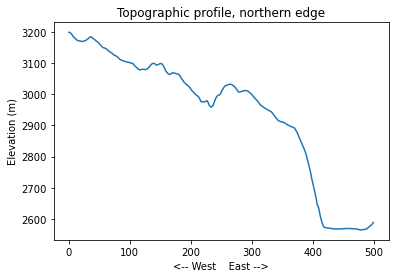

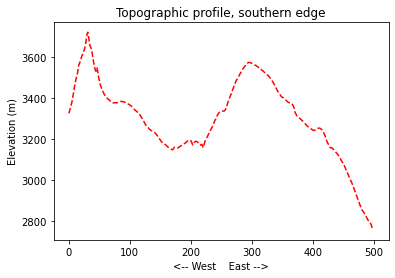

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

topo = np.loadtxt('data/topo.asc', delimiter=',')

plt.plot(topo[0,:])
plt.title('Topographic profile, northern edge')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.show()

plt.plot(topo[-1,:], 'r--')
plt.title('Topographic profile, southern edge')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.show() 

![](fig/output_74_0.png)
![](fig/output_74_1.png)


> ## Scientists dislike typing
>
> We will always use the syntax `import numpy` to import NumPy. However,
> in order to save typing, it is [often
> suggested](http://www.scipy.org/getting-started.html#an-example-script
> ) to make a shortcut like so: `import numpy as np`. If you ever see
> Python code using a NumPy function with `np` (for example,
> `np.loadtxt(...)`), it's because they've used this shortcut.

To better compare these profiles, we can plot them as separate lines in
a single figure using the argument `hold=True`, This will force all
subsequent calls to `plt.plot` to use the same axes (until it reaches
`plt.show()`). The argument `label=` holds the label that will appear in the legend.

<span style='color:red'> Why do we use the int statement in this code block?  </span> 

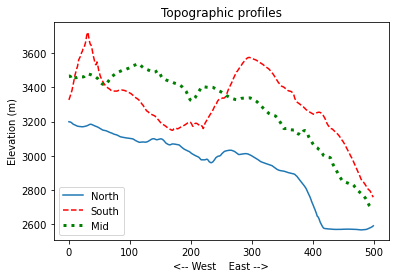

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

topo = np.loadtxt('data/topo.asc', delimiter=',')

plt.plot(topo[0,:], label='North')

plt.plot(topo[-1,:], 'r--', label='South')

plt.plot(topo[int(len(topo)/2),:], 'g:', linewidth=3, label='Mid')

plt.title('Topographic profiles')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.legend(loc = 'lower left')

plt.show() 

 ## Make your own plots 

 Create three separate plots showing how the maximum (`numpy.max()`),
 minimum (`numpy.min()`), and mean (`numpy.mean()`) elevation changes
 with longitude. Label the axes and include a title for each of the
 plots (Hint: use `axis=0`).

 Convert the separate plots into a single plot that includes all three
 statistics (using `hold=True`). Create a legend.

 ## Subplots (take home)

 We often want to arrange separate plots in layouts with multiple rows
 and columns. The script below uses subplots to show the elevation
 profile at the western edge, the mid longitude, and eastern edge of
 the region. Subplots can be a little weird because they require the
 axes to be defined before plotting. Type (don't copy-past!) the code
 below to get a sense of how it works.
 
This script uses a number of new commands. The function `plt.figure()`
creates a space into which we will place the three plots. The parameter
`figsize` tells Python how big to make this space. Each subplot is
placed into the figure using the `subplot` command. The `subplot`
command takes 3 parameters: the first denotes the total number of rows
of subplots in the figure, the second is the total number of columns of
subplots in the figure, and the final parameters identifies the
position of the subplot in the grid. The axes of each subplot are
called with different variable (axes1, axes2, axes3, axes4). Once a
subplot is created, the axes can be labeled using the `set_xlabel()`
(or `set_ylabel()`) method. `plt.show()` is called after the entire
figure is set up.

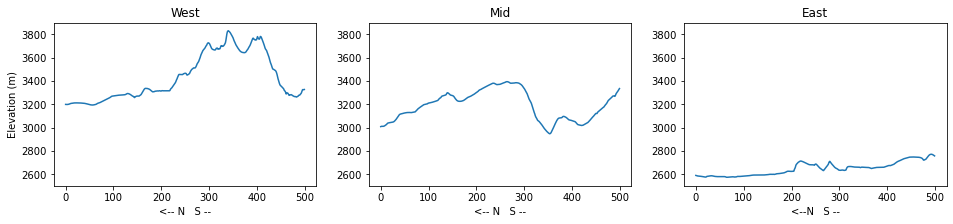

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

topo = np.loadtxt('data/topo.asc', delimiter=',')

fig = plt.figure(figsize=(16.0, 3.0))

axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.plot(topo[:,0])
axes1.set_ylim([2500,3900])
axes1.set_ylabel('Elevation (m)')
axes1.set_xlabel('<-- N   S --')
axes1.set_title('West')

axes2.plot(topo[:,int(len(topo)/2)])
axes2.set_ylim([2500,3900])
axes2.set_xlabel('<-- N   S --')
axes2.set_title('Mid')

axes3.plot(topo[:,-1])
axes3.set_ylim([2500,3900])
axes3.set_xlabel('<--N   S --')
axes3.set_title('East')

plt.show(fig) 

## Subplots of DEMs (Takehome) 
 
Make a 2x2 grid of subplots that use the function `imshow` to display
each quarter of the dataset (ie. split down the middle in both x and y).

* Don't label axes or add a colorbar. It can be tricky to do this with subplots.
* To set the range of colors for one subplot, include the arguments `vmin` and `vmax`
in `imshow` like this:


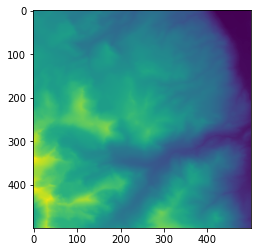

In [55]:
vmin = topo.min()
vmax = topo.max()
plt.imshow(topo, vmin=vmin, vmax=vmax) 